# Si111

In [1]:
#
#
# This example shows the diffraction by a Si 111 crystal calculated in a variety of modes (see main):
#
#    - make_plots( calculate_standard_interface() )
#      using the standard interface via definition of a photon grid (DiffractionSetupSweeps) and
#      the DiffractionResult object
#
#    - calculate_with_complex_amplitude_photon(method=0 or 1)
#      Calculates diffraction of many photons (0) or a photon bunch (1) using ComplexAmplitudePhoton,
#      so a photon with electric field amplitude.
#
#    - calculate_with_polarized_photon(method=0 or 1)
#      Calculates Stokes parameters after diffraction of many photons (0) or a photon bunch (1) using
#      PolarizedPhoton, so photons with info on the Stokes parameters.
#
#

import numpy
# for plots
from srxraylib.plot.gol import plot

from crystalpy.diffraction.GeometryType import BraggDiffraction
from crystalpy.diffraction.DiffractionSetupXraylib import DiffractionSetupXraylib
from crystalpy.diffraction.DiffractionSetupSweeps import DiffractionSetupSweeps
from crystalpy.diffraction.Diffraction import Diffraction

from crystalpy.polarization.MuellerDiffraction import MuellerDiffraction
from crystalpy.util.StokesVector import StokesVector
from crystalpy.util.Vector import Vector


from crystalpy.util.Photon import Photon
from crystalpy.util.ComplexAmplitudePhoton import ComplexAmplitudePhoton
from crystalpy.util.PolarizedPhoton import PolarizedPhoton

from crystalpy.util.ComplexAmplitudePhotonBunch import ComplexAmplitudePhotonBunch
from crystalpy.util.PolarizedPhotonBunch import PolarizedPhotonBunch

Using mpmath.


In [2]:
def calculate_standard_interface(do_plot=0, calculation_method=0):

    # Create a diffraction setup.

    print("\nCreating a diffraction setup...")
    diffraction_setup = DiffractionSetupSweeps(geometry_type          = BraggDiffraction(),  # GeometryType object
                                               crystal_name           = "Si",                             # string
                                               thickness              = 1e-2



                                               ,                             # meters
                                               miller_h               = 1,                                # int
                                               miller_k               = 1,                                # int
                                               miller_l               = 1,                                # int
                                               asymmetry_angle        = 0,#10.0*numpy.pi/180.,                              # radians
                                               azimuthal_angle        = 0.0,                              # radians
                                               energy_min             = 8000.0,                           # eV
                                               energy_max             = 8000.0,                           # eV
                                               energy_points          = 1,                                # int
                                               angle_deviation_min    = -100e-6,                          # radians
                                               angle_deviation_max    = 100e-6,                           # radians
                                               angle_deviation_points = 500)                              # int



    # Create a Diffraction object.
    diffraction = Diffraction()

    # Create a DiffractionResult object holding the results of the diffraction calculations.
    print("\nCalculating the diffraction results...")
    diffraction_result = diffraction.calculateDiffraction(diffraction_setup, calculation_method=calculation_method)

    #
    # Now the Mueller/Stokes calculation from the diffraction results
    #

    mueller_diffraction = MuellerDiffraction(diffraction_result,
                                             StokesVector([1,0,1,0]),
                                             inclination_angle=0.0) #np.pi*45/180)

    # Create a MullerResult object.
    print("\nCalculating the Stokes vector...")
    mueller_result = mueller_diffraction.calculate_stokes()

    if do_plot: make_plots(mueller_result)

    return mueller_result

In [3]:
def make_plots(mueller_result):
    #
    # plots
    #
    diffraction_result = mueller_result.diffraction_result

    photon_energies = diffraction_result.energies()
    deviation_angles = diffraction_result.angleDeviations()

    print("Number of energy points: %d"%photon_energies.size)
    print("Number of angular points: %d"%deviation_angles.size)
    print("_intensity shape: ",diffraction_result._intensities.shape)
    print("_phases shape: ",diffraction_result._phases.shape)

    from srxraylib.plot.gol import plot, four_plots
    plot( 1e6*deviation_angles,diffraction_result._intensities[0,:,0],
          1e6*deviation_angles,diffraction_result._intensities[0,:,1],
          1e6*deviation_angles,diffraction_result._intensities[0,:,2],
          title="Intensity for photon energy = %4.3f "%photon_energies[0],
          xtitle="Deviation angle urad",ytitle="Reflectivity",
          legend=['s-pol','p-pol','p/s ratio',],show=False)

    plot( 1e6*deviation_angles,diffraction_result._phases[0,:,0],
          1e6*deviation_angles,diffraction_result._phases[0,:,1],
          1e6*deviation_angles,diffraction_result._phases[0,:,2],
          title="Phase for photon energy = %4.3f "%photon_energies[0],
          xtitle="Deviation angle urad",ytitle="Reflectivity",
          legend=['s-pol','p-pol','p minus s pol'],show=False)

    # Stokes
    four_plots(1e6*deviation_angles,mueller_result._s0[0],
               1e6*deviation_angles,mueller_result._s1[0],
               1e6*deviation_angles,mueller_result._s2[0],
               1e6*deviation_angles,mueller_result._s3[0],
               title=["S0","S1","S2","S3"],xtitle="Deviation angle [urad]",
               yrange=[-1,1],show=False)

    # Plot the degree of circular polarization.
    plot(1e6*deviation_angles,mueller_result._s3[0]/mueller_result._s0[0],yrange=[-1,1],
         title="Circular Polarization S3/S0",xtitle="Deviation angle [urad]",ytitle="S3/S0",show=True)
#
#

In [4]:
def calculate_with_complex_amplitude_photon(method=0, calculation_method=0):

    # Create a diffraction setup.

    print("\nCreating a diffraction setup...")
    diffraction_setup = DiffractionSetupXraylib(geometry_type          = BraggDiffraction(),  # GeometryType object
                                               crystal_name           = "Si",                             # string
                                               thickness              = 1e-2,                             # meters
                                               miller_h               = 1,                                # int
                                               miller_k               = 1,                                # int
                                               miller_l               = 1,                                # int
                                               asymmetry_angle        = 0,#10.0*numpy.pi/180.,                              # radians
                                               azimuthal_angle        = 0.0)                              # radians                            # int


    energy                 = 8000.0                           # eV
    angle_deviation_min    = -100e-6                          # radians
    angle_deviation_max    = 100e-6                           # radians
    angle_deviation_points = 500

    angle_step = (angle_deviation_max-angle_deviation_min)/angle_deviation_points

    bragg_angle = diffraction_setup.angleBragg(energy)

    print("Bragg angle for E=%f eV is %f deg"%(energy,bragg_angle*180.0/numpy.pi))


    # Create a Diffraction object.
    diffraction = Diffraction()

    #
    # get wavevector with incident direction matching Bragg angle
    #
    K0 = diffraction_setup.vectorK0(energy)
    K0unitary = K0.getNormalizedVector()

    print("K0",K0.components())

    # method = 0 # diffraction for individual photons
    # method = 1 # diffraction for bunch
    ZZ = numpy.zeros(angle_deviation_points)



    if method == 0:
        # deviations = numpy.zeros(angle_deviation_points)
        intensityS = numpy.zeros(angle_deviation_points)
        intensityP = numpy.zeros(angle_deviation_points)
        bunch_out = ComplexAmplitudePhotonBunch()
        for ia in range(angle_deviation_points):
            deviation = angle_deviation_min + ia * angle_step

            # angle = deviation  + bragg_angle
            # yy = numpy.cos(angle)
            # zz = - numpy.abs(numpy.sin(angle))
            # photon = ComplexAmplitudePhoton(energy_in_ev=energy,direction_vector=Vector(0.0,yy,zz))

            # minus sign in angle is to perform cw rotation when deviation increses
            Vin = K0unitary.rotateAroundAxis(Vector(1,0,0),-deviation)
            photon = ComplexAmplitudePhoton(energy_in_ev=energy,direction_vector=Vin)

            photon_out = diffraction.calculateDiffractedComplexAmplitudePhoton(diffraction_setup,
                             photon, calculation_method=calculation_method)
            bunch_out.addPhoton(photon_out)
            ZZ[ia] = deviation

    elif method == 1: # diffraction for bunch
        bunch_in = ComplexAmplitudePhotonBunch()
        for ia in range(angle_deviation_points):
            deviation =  angle_deviation_min + ia * angle_step

            # angle = deviation + bragg_angle
            # yy = numpy.cos(angle)
            # zz = - numpy.abs(numpy.sin(angle))
            # photon = ComplexAmplitudePhoton(energy_in_ev=energy,direction_vector=Vector(0.0,yy,zz))

            # minus sign in angle is to perform cw rotation when deviation increses
            Vin = K0unitary.rotateAroundAxis(Vector(1,0,0),-deviation)
            photon = ComplexAmplitudePhoton(energy_in_ev=energy,direction_vector=Vin)

            bunch_in.addPhoton( photon )
            ZZ[ia] = angle_deviation_min + ia * angle_step

        bunch_out = diffraction.calculateDiffractedComplexAmplitudePhotonBunch(diffraction_setup,
                          bunch_in,calculation_method=calculation_method)

    bunch_out_dict = bunch_out.toDictionary()
    print(bunch_out_dict.keys())

    plot(1e6*ZZ,bunch_out_dict["intensityS"],1e6*ZZ,bunch_out_dict["intensityP"],
         xtitle="theta - thetaB [urad]",title="Reflectivity calculation using ComplexAmplitudePhoton method:%d"%method,
         legend=["Sigma","Pi"])
#
#

In [5]:
def calculate_with_polarized_photon(method=0, calculation_method=0):

    # Create a diffraction setup.

    print("\nCreating a diffraction setup...")
    diffraction_setup = DiffractionSetupXraylib(geometry_type          = BraggDiffraction(),  # GeometryType object
                                               crystal_name           = "Si",                             # string
                                               thickness              = 1e-2



                                               ,                             # meters
                                               miller_h               = 1,                                # int
                                               miller_k               = 1,                                # int
                                               miller_l               = 1,                                # int
                                               asymmetry_angle        = 0,#10.0*numpy.pi/180.,                              # radians
                                               azimuthal_angle        = 0.0)                              # radians                            # int


    energy                 = 8000.0                           # eV
    angle_deviation_min    = -100e-6                          # radians
    angle_deviation_max    = 100e-6                           # radians
    angle_deviation_points = 500

    angle_step = (angle_deviation_max-angle_deviation_min)/angle_deviation_points

    bunch_in = PolarizedPhotonBunch()

    bragg_angle = diffraction_setup.angleBragg(energy)

    print("Bragg angle for E=%f eV is %f deg"%(energy,bragg_angle*180.0/numpy.pi))



    # Create a Diffraction object.
    diffraction = Diffraction()

    #
    # get wavevector with incident direction matching Bragg angle
    #
    K0 = diffraction_setup.vectorK0(energy)
    K0unitary = K0.getNormalizedVector()

    print("K0",K0.components())

    # method = 0 # diffraction for individual photons
    # method = 1 # diffraction for bunch
    ZZ = numpy.zeros(angle_deviation_points)

    if method == 0:
        bunch_out = PolarizedPhotonBunch()

        for ia in range(angle_deviation_points):
            deviation = angle_deviation_min + ia * angle_step

            # angle =  deviation + bragg_angle
            # yy = numpy.cos(angle)
            # zz = - numpy.abs(numpy.sin(angle))
            # photon = PolarizedPhoton(energy_in_ev=energy,direction_vector=Vector(0.0,yy,zz),
            #                          stokes_vector=StokesVector([1,0,1,0]))

            # minus sign in angle is to perform cw rotation when deviation increses
            Vin = K0unitary.rotateAroundAxis(Vector(1,0,0),-deviation)
            photon = PolarizedPhoton(energy_in_ev=energy,direction_vector=Vin,
                                     stokes_vector=StokesVector([1,0,1,0]))

            photon_out = diffraction.calculateDiffractedPolarizedPhoton(diffraction_setup,
                             incoming_polarized_photon=photon,
                             inclination_angle=0.0,
                             calculation_method=calculation_method)
            bunch_out.addPhoton( photon_out )
            ZZ[ia] = angle_deviation_min + ia * angle_step



    elif method == 1: # diffraction for bunch
        for ia in range(angle_deviation_points):
            deviation = angle_deviation_min + ia * angle_step

            # angle = deviation + bragg_angle
            # yy = numpy.cos(angle)
            # zz = - numpy.abs(numpy.sin(angle))
            # photon = PolarizedPhoton(energy_in_ev=energy,direction_vector=Vector(0.0,yy,zz),
            #                          stokes_vector=StokesVector([1,0,1,0]))

            # minus sign in angle is to perform cw rotation when deviation increses
            Vin = K0unitary.rotateAroundAxis(Vector(1,0,0),-deviation)
            photon = PolarizedPhoton(energy_in_ev=energy,direction_vector=Vin,
                                     stokes_vector=StokesVector([1,0,1,0]))

            bunch_in.addPhoton( photon )
            ZZ[ia] = angle_deviation_min + ia * angle_step

        bunch_out = diffraction.calculateDiffractedPolarizedPhotonBunch(diffraction_setup,bunch_in,0.0,
                                calculation_method=calculation_method)


    bunch_out_dict = bunch_out.toDictionary()

    plot(1e6*ZZ,bunch_out_dict["s0"],1e6*ZZ,bunch_out_dict["s1"],legend=["S0","S1"],
         xtitle="theta - thetaB [urad]",title="Polarized reflectivity calculation using method %d"%method)


In [6]:
calculation_method = 1 # 0=Zachariasen, 1=Guigay


Creating a diffraction setup...

Calculating the diffraction results...

Calculating the Stokes vector...
Number of energy points: 1
Number of angular points: 500
_intensity shape:  (1, 500, 3)
_phases shape:  (1, 500, 3)


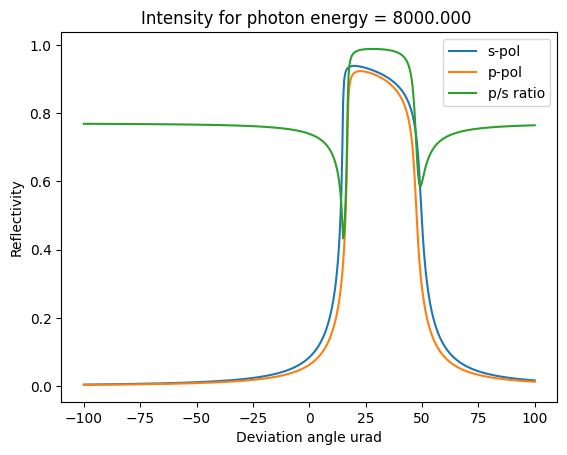

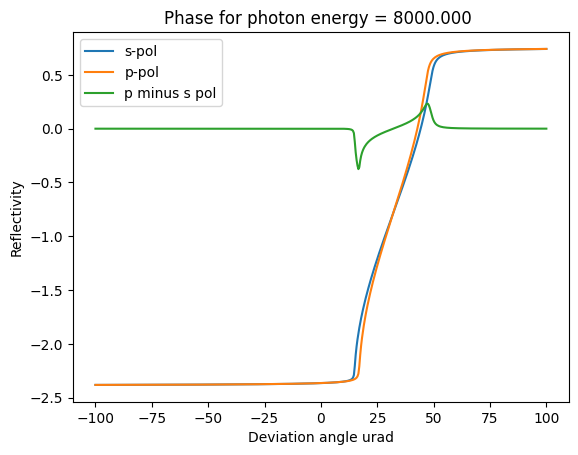

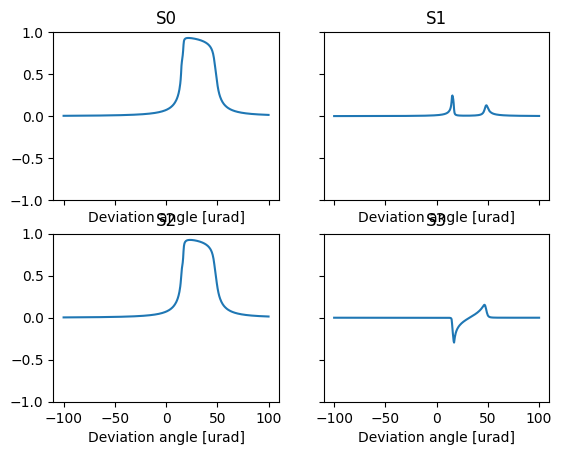

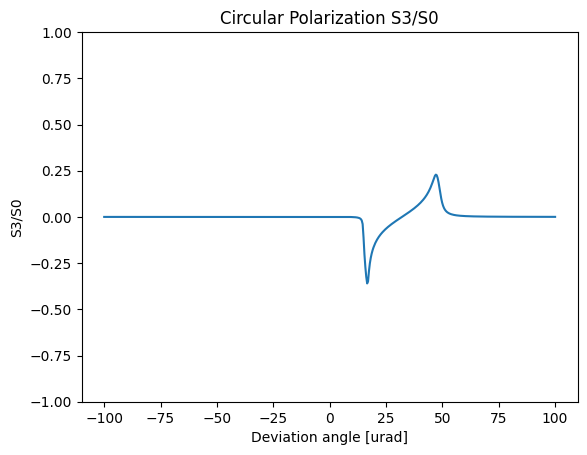

In [7]:
calculate_standard_interface(do_plot=1, calculation_method=calculation_method)


Creating a diffraction setup...
Bragg angle for E=8000.000000 eV is 14.308608 deg
K0 [ 0.00000000e+00  3.92841813e+10 -1.00196983e+10]
dict_keys(['number of photons', 'energies', 'deviations', 'vx', 'vy', 'vz', 'intensityS', 'intensityP', 'intensity', 'phaseS', 'phaseP', 'complexAmplitudeS', 'complexAmplitudeP'])


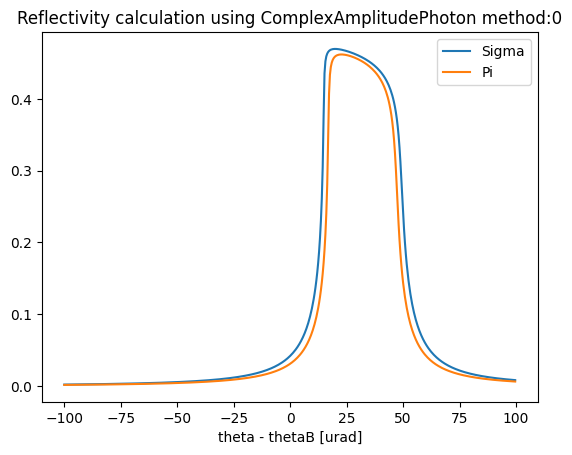

In [8]:
calculate_with_complex_amplitude_photon(method=0, calculation_method=calculation_method)


Creating a diffraction setup...
Bragg angle for E=8000.000000 eV is 14.308608 deg
K0 [ 0.00000000e+00  3.92841813e+10 -1.00196983e+10]
dict_keys(['number of photons', 'energies', 'deviations', 'vx', 'vy', 'vz', 'intensityS', 'intensityP', 'intensity', 'phaseS', 'phaseP', 'complexAmplitudeS', 'complexAmplitudeP'])


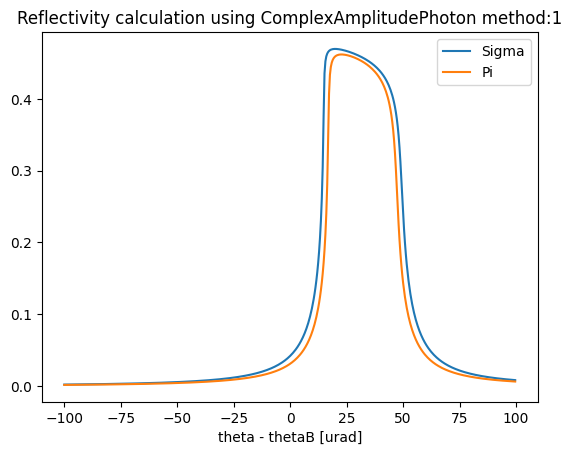

In [9]:
calculate_with_complex_amplitude_photon(method=1, calculation_method=calculation_method)


Creating a diffraction setup...
Bragg angle for E=8000.000000 eV is 14.308608 deg
K0 [ 0.00000000e+00  3.92841813e+10 -1.00196983e+10]


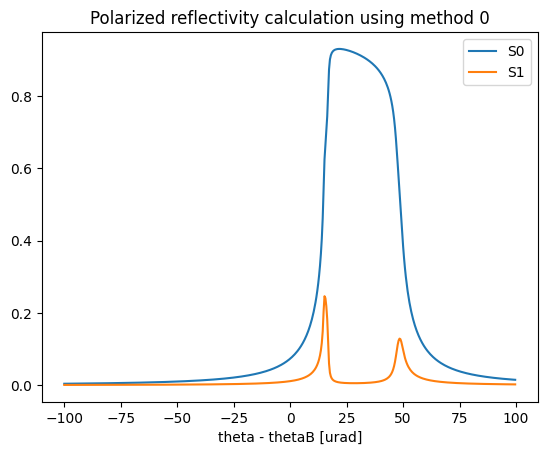

In [10]:
calculate_with_polarized_photon(method=0, calculation_method=calculation_method)


Creating a diffraction setup...
Bragg angle for E=8000.000000 eV is 14.308608 deg
K0 [ 0.00000000e+00  3.92841813e+10 -1.00196983e+10]


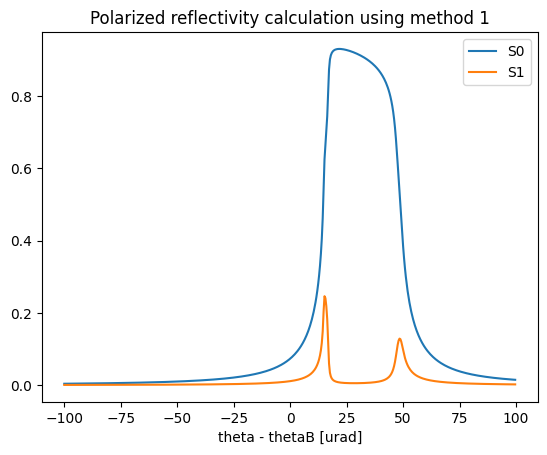

In [11]:
calculate_with_polarized_photon(method=1, calculation_method=calculation_method)